# Chocolate Bar Rating Dataset

The dataset contains features about cocoa. One of the main questions associated with this dataset is what category has the highest rating?

###### Imports

In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

###### Load Data

In [2]:
file = 'flavors_of_cacao.csv'
df = pd.read_csv(file, sep=',')

In [3]:
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


How many features and ratings are there?

In [4]:
df.shape

(1795, 9)

###### Check for Missing Data

In [5]:
pd.isnull(df).sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

There is minimal missing data, so the specific observations will be removed.

In [6]:
df = df.dropna(axis=0)

Verify missing items were removed.

In [7]:
df.shape

(1793, 9)

In [8]:
pd.isnull(df).sum()

Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           0
Broad Bean\nOrigin                   0
dtype: int64

###### Clean-up the Column Names

In [9]:
df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [10]:
df.columns = ['Company', 'Specific_Bean_Origin', 'REF',
       'Review_Date', 'Cocoa_Percent', 'Company_Location', 'Rating',
       'Bean_Type', 'Broad_Bean_Origin']
df.columns

Index(['Company', 'Specific_Bean_Origin', 'REF', 'Review_Date',
       'Cocoa_Percent', 'Company_Location', 'Rating', 'Bean_Type',
       'Broad_Bean_Origin'],
      dtype='object')

##### Understanding the Features

What are the types of features?

In [11]:
df.dtypes

Company                  object
Specific_Bean_Origin     object
REF                       int64
Review_Date               int64
Cocoa_Percent            object
Company_Location         object
Rating                  float64
Bean_Type                object
Broad_Bean_Origin        object
dtype: object

How many categories do each of the objects have?

In [12]:
print('Number of unique categories per feature:')
print('Company:', len(df.Company.unique()))
print('Specific_Bean_Origin:',len(df.Specific_Bean_Origin.unique()))
print('Cocoa_Percent:',len(df.Cocoa_Percent.unique()))
print('Company_Locations:',len(df.Company_Location.unique()))
print('Bean_Type:',len(df.Bean_Type.unique()))
print('Broad_Bean_Origin:',len(df.Broad_Bean_Origin.unique()))

Number of unique categories per feature:
Company: 416
Specific_Bean_Origin: 1038
Cocoa_Percent: 45
Company_Locations: 60
Bean_Type: 41
Broad_Bean_Origin: 99


There are a signigicant number of categories for each of these features. There did not appear to be an issue with inconsitency in how the data was typed in, so each of these features will retain that number of categories.

How about the number features? what kind of range do they have?

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
REF,1793.0,1036.126046,553.128742,5.0,576.0,1073.00,1502.0,1952.0
Review_Date,1793.0,2012.326269,2.928666,2006.0,2010.0,2013.00,2015.0,2017.0
Rating,1793.0,3.185862,0.477668,1.0,3.0,3.25,3.5,5.0


The 'REF' feature is relative number to how long ago the review was, with a higher number being more recent.
<br/>
<br/>
The review date is by year and ranges from 2006 to 2017.
<br/>
<br/>
The rating is on a scale of 1-5.

##### What is the highest rated chocolate?

In [14]:
df[(df.Rating == 5)]

,Company,Specific_Bean_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Broad_Bean_Origin
78,Amedei,Chuao,111,2007,70%,Italy,5.0,Trinitario,Venezuela
86,Amedei,Toscano Black,40,2006,70%,Italy,5.0,Blend,


##### Exploring the features by how common the categories are and the average rating by categories.

##### Company

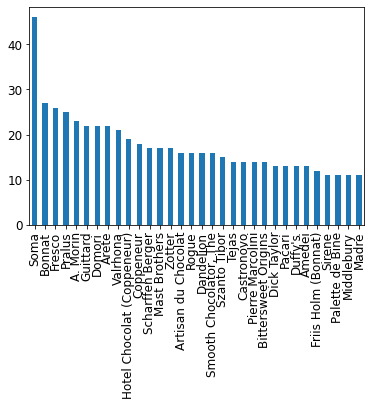

In [15]:
plt.rcParams.update({'font.size': 12})

df['Company'].value_counts()[df['Company'].value_counts() > 10].plot(kind="bar");

There are 416 companies, but only 32 of them have more than 10 different types of chocolate rated. The Soma company has significantly more variety in chocolate than other companies. Does being more specialized impact the rating of the chocolate?

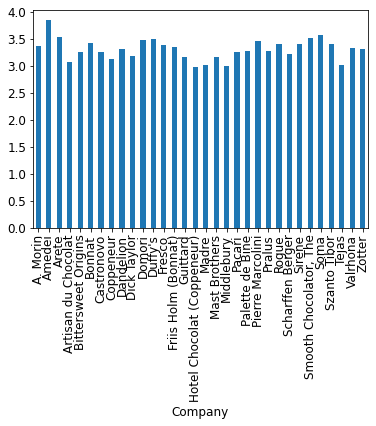

In [16]:
df.groupby('Company').Rating.mean()[(df['Company'].value_counts() > 10)].plot(kind='bar');

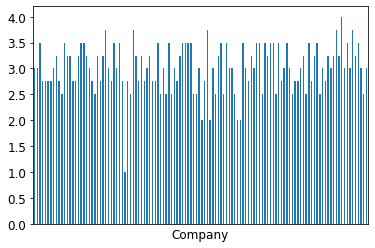

In [57]:
df.groupby('Company').Rating.mean()[(df['Company'].value_counts() == 1)].plot(kind='bar');
plt.xticks([]);

#Removed company names for visability.

There is not an obivious trend between the variety of chocolate reviewed at a company and the average rating. Something to note, though, is that Amedei is in the group with the greater amount of chocolate reviewed.

##### Specific Bean Origin

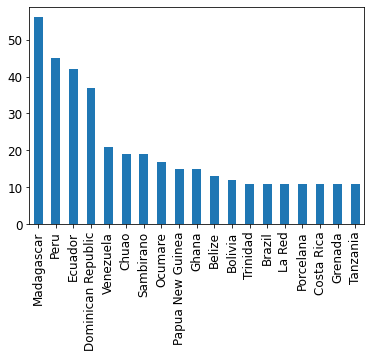

In [18]:
plt.rcParams.update({'font.size': 12})

df['Specific_Bean_Origin'].value_counts()[(df['Specific_Bean_Origin'].value_counts() > 10)
                                         ].plot(kind="bar");

Madagascar is the most common bean origin, but does it have the highest average rating?

In [19]:
print('Most Common Specific Bean Origin')
df.groupby('Specific_Bean_Origin').Rating.mean()[df['Specific_Bean_Origin'].value_counts() > 10
                                                ].sort_values(ascending=False).head(10)

Most Common Specific Bean Origin


Specific_Bean_Origin
Porcelana             3.363636
Brazil                3.340909
Chuao                 3.328947
Ocumare               3.308824
Sambirano             3.302632
Madagascar            3.290179
La Red                3.204545
Belize                3.173077
Papua New Guinea      3.133333
Dominican Republic    3.114865
Name: Rating, dtype: float64

In [20]:
print('Highest Rated Specific Bean Origin')
(df.groupby('Specific_Bean_Origin').Rating.mean().sort_values(ascending=False)).head(10)

Highest Rated Specific Bean Origin


Specific_Bean_Origin
Toscano Black                     4.166667
Ocumare 67, Puertofino            4.000000
Piura, Choc. Garage Exclusive     4.000000
Guanaja                           4.000000
Sambirano Valley, #216, MR, LC    4.000000
Guayas                            4.000000
Roxborough, Tobago                4.000000
Rio Peripa H.                     4.000000
Rio Dulce, Xoco                   4.000000
Cabosse                           4.000000
Name: Rating, dtype: float64

Of the the most common origins, Porcelana has the highest rating of 3.36. Chuao is one of the most common and is the same as one of the highest rated chocolates. The other is Toscano Black, which is not as common, but more highly rated.

##### Cocoa Percent

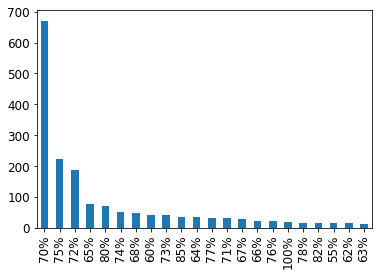

In [22]:
plt.rcParams.update({'font.size': 12})

df['Cocoa_Percent'].value_counts()[df['Cocoa_Percent'].value_counts() > 10].plot(kind="bar");

The most common cocoa percentage is 70%, which matches what the highest rated chocolate is. Still, how does the average rating for 70% cocoa compare?

In [23]:
(df.groupby('Cocoa_Percent').Rating.mean().sort_values(ascending=False)).head(10)

Cocoa_Percent
50%    3.750000
63%    3.604167
69%    3.500000
66%    3.380435
67%    3.351852
78%    3.338235
68%    3.287234
70%    3.274963
56%    3.250000
87%    3.250000
Name: Rating, dtype: float64

It might not be the highest rated, but 70% cocoa is still in the top rated.

##### Bean Type

In [51]:
(df.groupby('Bean_Type').Rating.mean().sort_values(ascending=False)).head(10)

Bean_Type
Criollo (Ocumare 67)        4.000
Criollo (Wild)              4.000
Trinitario (85% Criollo)    3.875
Forastero (Amelonado)       3.750
Trinitario, Nacional        3.750
Amazon mix                  3.750
Blend-Forastero,Criollo     3.750
Trinitario, TCGA            3.750
Criollo (Ocumare 77)        3.750
Amazon, ICS                 3.625
Name: Rating, dtype: float64

##### What does rating look like based on the top two combinations?

In [55]:
chuao_70 = df.loc[(df['Specific_Bean_Origin'] == 'Chuao') & (df['Bean_Type'] == 'Trinitario') & (
    df['Cocoa_Percent'] == '70%')]

In [56]:
print('The average rating for chocolate with bean origin of Chuao and Cocoa Percent of 70% is:')
chuao_70.Rating.mean()

The average rating for chocolate with bean origin of Chuao and Cocoa Percent of 70% is:


3.625

This combination does do better than the average rating of 3.25.

In [52]:
tb_70 = df.loc[(df['Specific_Bean_Origin'] == 'Toscano Black') & (df['Bean_Type'] == 'Blend') & (
    df['Cocoa_Percent'] == '70%')]

In [53]:
print('The average rating for chocolate with bean origin of Toscano Black and Cocoa Percent of 70% is:')
tb_70.Rating.mean()

The average rating for chocolate with bean origin of Toscano Black and Cocoa Percent of 70% is:


5.0

Toscano Black combination has an average rating of 5. Is this because there is only the one instance of the combination?

In [54]:
len(tb_70)

1

Since there is only one instance of this combination, it cannot be determined if there is a trend towards this combination being highly rated. 

##### Conclusions

There are no apparent trends as to what kind of combinations make-up the highest rated chocolate. The recommendation would be to look further into the other ingredients and the processes used in making the different types of chocolate.